## Section 1: Load Dataset

In [2]:
import pandas as pd
import numpy as np

Define column names from UCI site

In [3]:
columns = ['ID', 'Diagnosis'] + [ 
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

Load dataset

In [4]:
df = pd.read_csv("data.csv", header=None, names=columns)

Drop the ID column

In [5]:
df = df.drop("ID", axis=1)

Encode the diagnosis column: M = 1 (malignant), B = 0 (benign)

In [6]:
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

Preview the cleaned dataset

In [7]:
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Section 2: Prepare Features and Normalize

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Seperate features and target

In [9]:
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

Standardize the feature data

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split into training and testing datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 455
Test samples: 114


## Section 3: Train Classifier and Make Predictions

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Train a logistic regression model

In [13]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

Predict on test set

In [14]:
y_pred = model.predict(X_test)

Print accuracy

In [15]:
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.4f}")

Model Accuracy: 0.9737


## Section 4: Confusion Matrix Visualization

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Compute confusion matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)

Plot confusion matrix

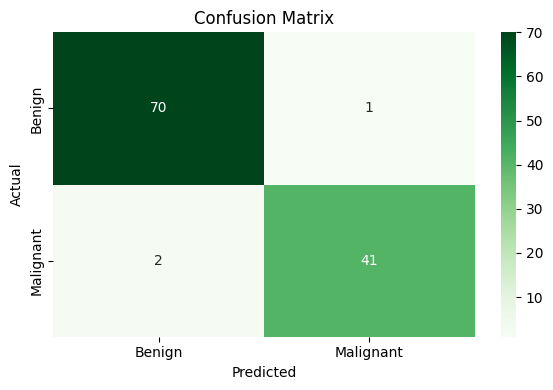

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", 
            xticklabels=["Benign", "Malignant"], 
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("model_accuracy.png")
plt.show()